# 03_visualizations

## Importando bibliotecas

In [1]:
# 📊 Visualização dos clusters
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os

## Carregando os dados

In [2]:
# Carregando os dados
rfm = pd.read_csv('../data/processed/rfm.csv')

## Processamento

### Boxplots para entender os clusters

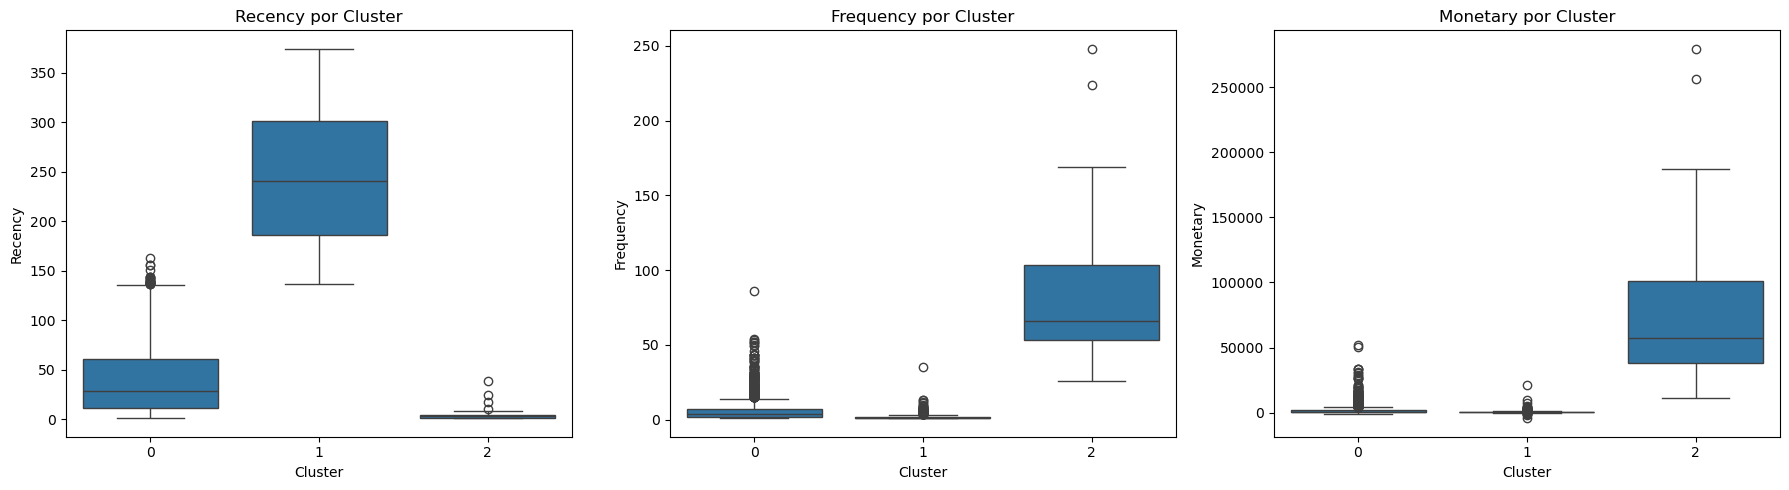

In [3]:
# Boxplots para entender os clusters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=rfm, x='Cluster', y='Recency', ax=axes[0])
axes[0].set_title('Recency por Cluster')

sns.boxplot(data=rfm, x='Cluster', y='Frequency', ax=axes[1])
axes[1].set_title('Frequency por Cluster')

sns.boxplot(data=rfm, x='Cluster', y='Monetary', ax=axes[2])
axes[2].set_title('Monetary por Cluster')

plt.tight_layout()
plt.show()


In [4]:
# Boxplot Recency
fig_recency = px.box(rfm, x="Cluster", y="Recency", title="Recency por Cluster")
fig_recency.show()

# Boxplot Frequency
fig_frequency = px.box(rfm, x="Cluster", y="Frequency", title="Frequency por Cluster")
fig_frequency.show()

# Boxplot Monetary
fig_monetary = px.box(rfm, x="Cluster", y="Monetary", title="Monetary por Cluster")
fig_monetary.show()


In [5]:
# Garante que a pasta existe
os.makedirs("figs", exist_ok=True)

# Recency
fig_recency = px.box(rfm, x="Cluster", y="Recency", title="Recency por Cluster")
fig_recency.write_image("../reports/figures/recency_boxplot.png")

# Frequency
fig_frequency = px.box(rfm, x="Cluster", y="Frequency", title="Frequency por Cluster")
fig_frequency.write_image("../reports/figures/frequency_boxplot.png")

# Monetary
fig_monetary = px.box(rfm, x="Cluster", y="Monetary", title="Monetary por Cluster")
fig_monetary.write_image("../reports/figures/monetary_boxplot.png")


### Interpretação simples

In [6]:
# Interpretação simples
for c in rfm['Cluster'].unique():
    segment = rfm[rfm['Cluster'] == c]
    print(f"Cluster {c} — Clientes: {len(segment)}")
    print(segment[['Recency', 'Frequency', 'Monetary']].mean(), "\n")

Cluster 1 — Clientes: 1105
Recency      246.365611
Frequency      1.846154
Monetary     459.541105
dtype: float64 

Cluster 0 — Clientes: 3244
Recency        40.091245
Frequency       5.595561
Monetary     1821.839757
dtype: float64 

Cluster 2 — Clientes: 23
Recency          6.086957
Frequency       86.869565
Monetary     81835.857391
dtype: float64 



In [7]:
# Agrupa por cluster e calcula a média de RFM + contagem de clientes
resumo_clusters = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
}).round(2)

# Adiciona a contagem de clientes por cluster
resumo_clusters['Clientes'] = rfm['Cluster'].value_counts().sort_index()

# Reorganiza colunas, se quiser
resumo_clusters = pd.DataFrame(resumo_clusters[['Clientes', 'Recency', 'Frequency', 'Monetary']])

display(resumo_clusters)


Clientes  Recency  Frequency  Monetary
Cluster                                        
0            3244    40.09       5.60   1821.84
1            1105   246.37       1.85    459.54
2              23     6.09      86.87  81835.86

In [8]:
resumo_clusters_reset = resumo_clusters.reset_index()

fig_table = go.Figure(data=[go.Table(
    header=dict(values=list(resumo_clusters_reset.columns),
                fill_color='lightblue', align='left'),
    cells=dict(values=[resumo_clusters_reset[col] for col in resumo_clusters_reset.columns],
               fill_color='white', align='left'))
])

# 🔧 Ajuste de layout para remover espaços em branco
fig_table.update_layout(
    width=600,
    height=300,
    margin=dict(l=15, r=15, t=15, b=0) # remove espaços laterais e inferior
)

# Salva imagem limpa
fig_table.write_image("../reports/figures/cluster_summary_table.png")

# Exibe no notebook (opcional)
fig_table.show()